In [1]:
import torch
import torch.nn as nn
import torch.autograd as autograd

from modules.pinn import *



import matplotlib.pyplot as plt


In [2]:
fpath = './models/cpinn_trial_2.data'
state_dict = torch.load(fpath)

domain_no = 3
global_lb = -1.0
global_rb = 1.0

figure_path = None

model = CPINN(domain_no, global_lb, global_rb, figure_path)

sample = {'Model{}'.format(i+1): PINN(i).cuda() for i in range(domain_no)}
points = [-1.0, -0.5, 0.5, 1.0]
model.module_update(sample)
model.make_domains(points)
model.make_boundaries(points)

model.load_state_dict(state_dict)

<All keys matched successfully>

In [3]:
def make_tensor(x):
    return torch.tensor(x).unsqueeze(0).T.type(torch.FloatTensor).cuda()

In [5]:
plots = np.arange(20000) / 10000 - 1.0
dw = 0.00001

# plots = np.arange(-0.01, 0.01, dw) - 0.5 
points_tensor = make_tensor(plots)

test = make_tensor([-0.5, -0.5 + dw])

In [6]:
output = model(points_tensor)


In [10]:
fname = "./data/cont_beam_3_dms.txt"
data = np.loadtxt(fname=fname)

x, y, u = data.T

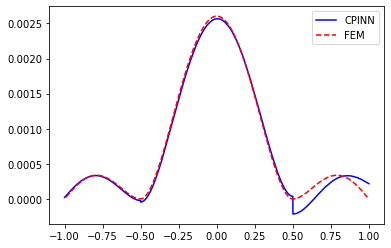

In [13]:
plt.plot(plots , output.cpu().detach().numpy(), 'b', label='CPINN')
plt.plot(x, u, 'r--', label='FEM')
plt.legend()

tensor([[ 0.0064],
        [-0.1728]], device='cuda:0', grad_fn=<AddBackward0>)


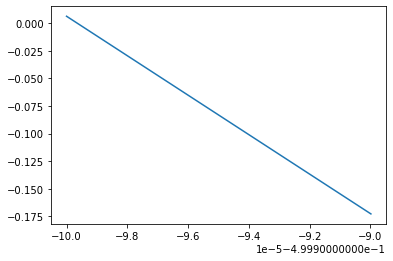

In [45]:
out = model(test)
print(out)
plt.plot(test.cpu().detach().numpy(), out.cpu().detach().numpy())